In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import numpy as np
import random


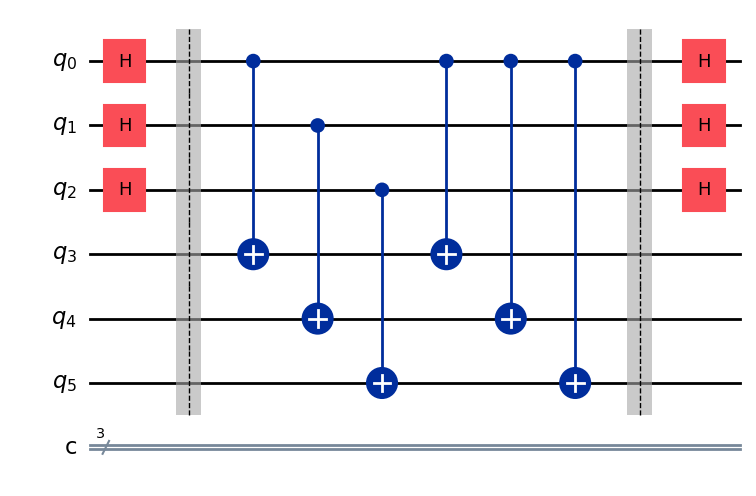

In [8]:
b = '111'

def simon_oracle(b):
    b = b[::-1]
    n = len(b)
    qc = QuantumCircuit(n*2)
    for i in range(n):
        qc.cx(i, n+i)

    if '1' not in b:
        return qc
    
    j = b.find('1')

    for q in range(n):
        if b[q] == '1':
            qc.cx(j, q +n)
    return qc

n = len(b)

simon = QuantumCircuit(n*2, n)

simon.h(range(n))

simon.barrier()

simon = simon.compose(simon_oracle(b))

simon.barrier()

simon.h(range(n))
simon.draw('mpl')
# state = Statevector(simon)
# print(state)
# state.draw('latex')



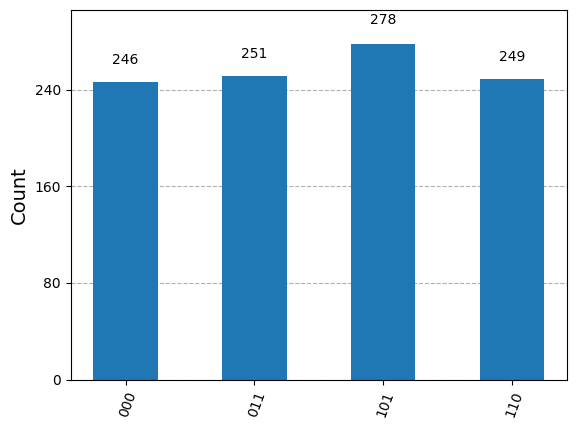

In [9]:

simon.measure(range(n), range(n))

sim = Aer.get_backend('aer_simulator')
 
results = sim.run(simon).result()
counts = results.get_counts()

plot_histogram(counts)


In [ ]:
def find_possible_b(upper_limit):
   all_vals = (range(1, upper_limit))
   poss_bin_vals = [format(val, f'0{int(np.log2(upper_limit))}b') for val in all_vals]
   return poss_bin_vals

dot_val = lambda x, y : np.dot(np.array([int(s) for s in x]), np.array([int(p) for p in y])) % 2


def getting_period(states, periods):
    for period in periods:
        inavlid_period = False
        for state in states:
            if state != '000':
                if dot_val(state, period):
                    inavlid_period = True
                    break
        if not inavlid_period:
            return period

survived_states = list(counts.keys())
possible_periods = find_possible_b(2**n)

    
period = getting_period(survived_states, possible_periods)
print('the period is ', period)

the period is  111
